In [1]:
import numpy as np
import pandas as pd
import os
import time
import re
import random

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.externals import joblib
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [2]:
# from generate_population import PopulationGenerator
#random.seed( 10 )
stop_words = stopwords.words('english')
startProgram = time.time()
def process_text(text):
    text = text.encode('ascii', errors='ignore').decode()
    text = text.lower()
    text = re.sub(r'http\S+', ' ', text)
    text = re.sub(r'#+?!', ' ', text)
    text = re.sub(r'@[A-Za-z0-9]+', ' ', text)
    text = re.sub(r"([A-Za-z]+)'s", r"\1 is", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"don't", "do not ", text)
    text = re.sub(r"did't", "did not ", text)
    text = re.sub(r"shouldn't", "should not ", text)
    text = re.sub(r"wouldn't", "would not ", text)
    text = re.sub(r"hadn't", "had not ", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"won't", "will not ", text)
    text = re.sub(r"isn't", "is not ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"dont", " do not", text)
    text = re.sub(r"didnt", " did not", text)
    text = re.sub(r"wont", " will not", text)
    text = re.sub(r"cant", " can not", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = re.sub(r'\r\n', ' ', text)
    text = re.sub(r'\r\t', ' ', text)
    
    text = re.sub(r'[-_+!?.]+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    #print(text)
    return text

In [3]:
def remove_stopwords(tokens):
    res = []
    for token in tokens:
        if token not in stop_words:
            res.append(token)
    return res

def lemmatize(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemma_list = []
    for token in tokens:
        lemma = lemmatizer.lemmatize(token, 'v')
        if lemma == token:
            lemma = lemmatizer.lemmatize(token)
        lemma_list.append(lemma)
    # return [ lemmatizer.lemmatize(token, 'v') for token in tokens ]
    return lemma_list

def stemmer(tokens):
    stemmer = nltk.stem.PorterStemmer()
    stemmer_list = []
    for token in tokens:
        stemmed = stemmer.stem(token)
        stemmer_list.append(stemmed)
    return stemmer_list

def process_all(tokens):
    res = remove_stopwords(tokens)
    return stemmer(res)

In [4]:
def get_fitness(population, features):
    vals = []
    func_start = time.time()
    population = np.array(population)
    for i, ind in enumerate(population):
        ind_start = time.time()
        indices = np.where(ind == 1)[0]
        # mat = features * ind
        #s = np.sum(val, axis=0)t
        # vals.append(np.sum(mat))
        vals.append(features[:, indices].sum())
        print("Time taken for population :: {} -> ".format(time.time() - ind_start))
        print('-'*30)
    print(time.time() - func_start)
    return vals

In [5]:
def select_population(percentage_zip):
    minimum_value = []
    percentage_zip = np.array(percentage_zip)
    max = percentage_zip[:, 1].sum()
    pick = random.uniform(0, max)
    current = 0
    # Selecting the parents for i in range(len(percentage_zip)):
    for i in range(len(percentage_zip)):
        current = current + percentage_zip[i][1]
        if current > pick:
            return percentage_zip[i]

def crossover(parent1, parent2): #Two_point_crossover 
    child1_gene = parent1
    child2_gene = parent2
    length_parent1 = len(parent1) - 1
    length_parent2 = len(parent2) - 1
    randomNum = random.random()
    if (randomNum < Pc):
#         print("CrossOver is Done")
        print("CrossOver is Done")
        # Take Index Before random_parent1_index and subtract the latter value for child 1
        size = min(len(parent1), len(parent2))
        cxpoint1 = random.randint(1, size-1)
        cxpoint2 = random.randint(1, size-2)
        if  cxpoint2 >= cxpoint1:
            cxpoint2 += 1
        else: # Swap the two cx points
            cxpoint1+=1
            cxpoint1, cxpoint2 = cxpoint2, cxpoint1

        child1_gene[cxpoint1:cxpoint2], child2_gene[cxpoint1:cxpoint2] = parent2[cxpoint1:cxpoint2], parent1[cxpoint1:cxpoint2]

    else:
        print("greater than probability")
        return parent1, parent2

    return child1_gene, child2_gene


'''
def crossover(parent1, parent2):#Uniform_Crossover
    child1_gene = parent1
    child2_gene = parent2
    indpb=0.5
    randomNum = random.random()
    if (randomNum < Pc):
        print("CrossOver is Done")
        
        size = min(len(parent1), len(parent2))
        for i in range(size):
            if random.random() < indpb:
                child1_gene[i], child2_gene[i] = parent2[i], parent1[i]

    else:
        print("greater than probability")
        return parent1, parent2

    return child1_gene, child2_gene

'''
'''
def crossover(parent1, parent2): #one_point_Crossover
    child1_gene = []
    child2_gene = []
    length_parent1 = len(parent1) - 1
    length_parent2 = len(parent2) - 1
    randomNum = random.random()
    if (randomNum < Pc):
        print("CrossOver is Done")
        # Take Index Before random_parent1_index and subtract the latter value for child 1
        random_parent1_index = 1 + int(random.random() * length_parent1)

        child1_gene = parent1[0:random_parent1_index] + parent2[random_parent1_index:]
        child2_gene = parent2[0:random_parent1_index] + parent1[random_parent1_index:]
    else:
        print("greater than probability")
        return parent1, parent2

    return child1_gene, child2_gene

'''

In [6]:
def mutation(child_chromosome):
    randomNum = random.random()
    rand_rate = random.randint(0, len(child_chromosome) - 1)
    Number_Mutation_gean=0
    previous_value =[]
    #print("child_chromosome Before:",child_chromosome)
    if randomNum < Pm:
        #print("***************8child_chromosome Operation")
        while True:
             now=rand_rate
             if(now not in previous_value):
                 Number_Mutation_gean=Number_Mutation_gean+1
                 child_chromosome[rand_rate] = int(not child_chromosome[rand_rate])
             rand_rate = random.randint(0, len(child_chromosome) - 1)       
             previous_value.append(now)
             if(Number_Mutation_gean==20):
                #print("child_chromosome After:",child_chromosome)
                break
    
    return child_chromosome

In [7]:
def replace_worst_fitness(population,  worst_fitness_values_previous,best_fitness_population):
    # # Removing the worst binary values to the population
#     population.remove(worst_fitness_value1)
#     population.remove(worst_fitness_value2)
#     print(len(worst_fitness_values))
#     print(len(mutated_chromosomes))
    for i in worst_fitness_values_previous:
        population.remove(i)
       
    for i in best_fitness_population:
        population.append(i)
    # # Adding the breeded binary values to the population
#     population.append(mutated_child1_chromosome)
#     population.append(mutated_child2_chromosome)
#     for i in mutated_chromosomes:
#         if i not in population:
#             population.append(i)
    return population


In [8]:

# # Creating Population
# def generate_population(population_size, vocab_size): #Any_NumberofFeatuers
#     return np.random.choice([0, 1], size=(population_size, vocab_size)).tolist()

def generate_population(population_size):#With_NumberofFeatuers
    pop = []
    for i in range(population_size):
        OneChromosome = [1]*4000 + 3520*[0]
        random.shuffle(OneChromosome)
        pop.append(OneChromosome)
    return pop

In [9]:
# # How much generation do you want to go?
# # # Number of documents

ng20 = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

categories = ng20.target_names
n=500
classes = 20 
#data_each_100 = []
#filename_each_100 = []
#for i in range(len(categories)):
    # print(categories[i])
    #temp_list = [categories[i]]
    # print(temp_list)
    #temp = fetch_20newsgroups(subset='all', categories=temp_list)
    #temp_data = temp.data[:20]
    #temp_filename = temp.filenames[:20]
    #data_each_100.append(temp_data)
    #filename_each_100.append(temp_filename)
    
#final_list_data = []
#final_filename_list = []
#for i in range(20):
    #for j in range(20):
        #final_list_data.append(data_each_100[i][j])
        #final_filename_list.append(filename_each_100[i][j])
#docs = final_list_data
#docs = n20.
#filenames = final_filename_list
docs = ng20.data[:n]

filenames = ng20.filenames[:n]
print('-'*30)
filenumbers = []
for file in filenames:
    filenumbers.append(file.split("\\")[-2])

data_titles = pd.DataFrame({'title': docs})
data_titles.count()

datafile_numbers = pd.DataFrame({'filenumbers': filenumbers})
datafile_numbers.count()

datafile_path = pd.DataFrame({'filepath': filenames})
datafile_path.count()

data = pd.concat([data_titles, datafile_numbers, datafile_path], axis=1)
data = pd.DataFrame(data['title']).dropna()

data['title'] = data['title'].apply(process_text)
data['title'] = data['title'].apply(lambda x: ' '.join(process_all(x.split())))

print('preprocessing done....')

data_raw = data['title']

# Getting the fitness Score via TFIDF
vectorizer = TfidfVectorizer(stop_words='english')
#vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english',max_features=5))
features = vectorizer.fit_transform(data_raw)
vocab = vectorizer.get_feature_names()
num_features = len(vocab)
#population_size = features.shape[0]
population_size = 50
# Config
# # Ps = Roulette Method
Pc = 0.9  # Probability of Crossover
Pm = 0.1  # Probability of Mutation (0-1)
num_generation =100
# num_core = 4


print("Generating initial population and scores")

start = time.time()
# pop_generator = PopulationGenerator(population_size, features.toarray(), num_core)
# pop_generator.start()
# pop_generator.join_processes()

# scores = np.frombuffer(pop_generator.scores.get_obj())
# population = pop_generator.population
#population = generate_population(population_size, num_features)#with_anyNumberofFeatuers
population = generate_population(population_size)
#print(len(population))
scores = get_fitness(population, features.toarray())

#print("Time taken for generating initial population config :: {},{} --> {}".format(population_size, num_features, time.time()-start))
fitness_function = []
averages = []
prev_val = 0
count_avg=0
print("Runnig GE...")
for i in range(num_generation):
    gen_time_tracker = time.time()
   
    # Sorting the Zipped Populations
    zipped_population = list(zip(population, scores))
    zipped_population.sort(key=lambda t: t[1], reverse=True)
    print("Generation :: {}".format(i),"High FF is:",zipped_population[0][1])
    #avg_fit = sum(v[1] for v in zipped_population) / len(zipped_population)
    avg_fit =zipped_population[0][1]
    print("Average_fit",avg_fit)
    if(avg_fit <= prev_val)or(avg_fit > prev_val) :
        #print("Enter IF")
        if(avg_fit == prev_val):
            count_avg=count_avg+1
            print("Average_fit",avg_fit,"count_avg",count_avg)
            if(count_avg==10):
                print("Stopping...",count_avg)
                break
        else:
            count_avg=0
    prev_val = avg_fit
    averages.append(avg_fit)
    #if(avg_fit < prev_val):

#         count_avg=count_avg+1
#         if(count_avg<11):
#             print("Stopping...")
#             break
#     prev_val = avg_fit
#     averages.append(avg_fit)
   
    
    print("Selecting Parents ...")
#     print('zipped pop')
#     print(zipped_population)
    chromosomes = []
    print("Doing Crossover ...") 
    for i in range(5):
        father = select_population(zipped_population)
#         zipped_population.remove(tuple(father))
        mother = select_population(zipped_population)
#         print('father')
#         print(father)
#         print('mother')
#         print(mother)
                   
        child1_chromosome, child2_chromosome = crossover(father[0], mother[0])
        chromosomes.extend([child1_chromosome, child2_chromosome])
#         zipped_population.remove(tuple(mother))
        print('done '+str(i))

    
    # print("Mutation...")
    print("Doing Mutation ...")
    mutated_chromosomes = []
    for chromo in chromosomes:
        mutated_chromosomes.append(mutation(chromo))
    
    # Replace Worst Parent (via Fitness Function) with new Mutated Child on Main Data
    # Getting the Worst Value
    print('Replacing Population with Worst Fitness ...')
    #get fitness function of new child
#     print("length of mutated chromosomes"+len(mutated_chromosomes))
    scores_new_mutated_child_population = get_fitness(mutated_chromosomes,features.toarray())
    
    zipped_new_mutated_child_population = list(zip(mutated_chromosomes, scores_new_mutated_child_population))
    
    zipped_worst_fitness_values_previous = [zipped_population[-i-1] for i in range(10)]
#     worst_fitness_value1 = zipped_population[-1][0]
#     worst_fitness_value2 = zipped_population[-2][0]

    
    #appending generated and previous worst from population
    zipped_new_mutated_child_population.extend(zipped_worst_fitness_values_previous)
    #sorting on descending order
    zipped_new_mutated_child_population.sort(key=lambda t: t[1], reverse=True)
    # Getting Best 10 fitness from appended 
    best_fitness_population = [zipped_new_mutated_child_population[i][0] for i in range(10)]
    #select only chromosomes to compare in population during removing items 
    worst_fitness_values_previous= [zipped_worst_fitness_values_previous[i][0] for i in range(10)]
    
    population, scores = zip(*zipped_population)
    population = list(population)
    scores = list(scores)
#     population = replace_worst_fitness(population, worst_fitness_value1, worst_fitness_value2,
#                                        mutated_child1_chromosome, mutated_child2_chromosome)
    
    population = replace_worst_fitness(population, worst_fitness_values_previous,best_fitness_population)

    scores[-10:] = get_fitness(population[-10:], features.toarray())
#     print(scores)
    print("Time taken :: {}".format(time.time() - gen_time_tracker))


print('Genetic Done')
zipped_population.sort(key=lambda t: t[1], reverse=True)
top_population = population[np.argmax(scores)]
High_FF=zipped_population[0][1]
#print (zipped_population)
#print ("Top_population",top_population)
print ("Highest GA FF ",High_FF)
print("Prossing Time :: {}".format(time.time() - startProgram ))

# origin_path = "/home/ashis/ML/projects/Naif/code/naif/gasfla/pickles/"
# joblib.dump(filenames, origin_path+'ga/filenames.pkl')
# joblib.dump(vectorizer, origin_path+'ga/vectorizer.pkl')
# joblib.dump(features, origin_path+'ga/features_sparse.pkl')
# joblib.dump(top_population, origin_path+'ga/population_best.pkl')

------------------------------
preprocessing done....
Generating initial population and scores
Time taken for population :: 0.03299832344055176 -> 
------------------------------
Time taken for population :: 0.025996923446655273 -> 
------------------------------
Time taken for population :: 0.03499937057495117 -> 
------------------------------
Time taken for population :: 0.0319981575012207 -> 
------------------------------
Time taken for population :: 0.028002262115478516 -> 
------------------------------
Time taken for population :: 0.034998178482055664 -> 
------------------------------
Time taken for population :: 0.029999256134033203 -> 
------------------------------
Time taken for population :: 0.03100132942199707 -> 
------------------------------
Time taken for population :: 0.030991792678833008 -> 
------------------------------
Time taken for population :: 0.029999256134033203 -> 
------------------------------
Time taken for population :: 0.030000925064086914 -> 
------

Time taken for population :: 0.04099297523498535 -> 
------------------------------
0.3190038204193115
Time taken :: 0.993992805480957
Generation :: 2 High FF is: 1435.71411011225
Average_fit 1435.71411011225
Selecting Parents ...
Doing Crossover ...
CrossOver is Done
done 0
CrossOver is Done
done 1
CrossOver is Done
done 2
CrossOver is Done
done 3
CrossOver is Done
done 4
Doing Mutation ...
Replacing Population with Worst Fitness ...
Time taken for population :: 0.026993989944458008 -> 
------------------------------
Time taken for population :: 0.03399538993835449 -> 
------------------------------
Time taken for population :: 0.030002832412719727 -> 
------------------------------
Time taken for population :: 0.028998851776123047 -> 
------------------------------
Time taken for population :: 0.03399229049682617 -> 
------------------------------
Time taken for population :: 0.02899456024169922 -> 
------------------------------
Time taken for population :: 0.025000572204589844 -> 


Time taken :: 0.9499974250793457
Generation :: 6 High FF is: 1456.8798873950998
Average_fit 1456.8798873950998
Selecting Parents ...
Doing Crossover ...
CrossOver is Done
done 0
CrossOver is Done
done 1
CrossOver is Done
done 2
CrossOver is Done
done 3
CrossOver is Done
done 4
Doing Mutation ...
Replacing Population with Worst Fitness ...
Time taken for population :: 0.03600144386291504 -> 
------------------------------
Time taken for population :: 0.02599620819091797 -> 
------------------------------
Time taken for population :: 0.02400064468383789 -> 
------------------------------
Time taken for population :: 0.028998613357543945 -> 
------------------------------
Time taken for population :: 0.027010679244995117 -> 
------------------------------
Time taken for population :: 0.0389711856842041 -> 
------------------------------
Time taken for population :: 0.02800273895263672 -> 
------------------------------
Time taken for population :: 0.03599810600280762 -> 
-----------------

CrossOver is Done
done 1
greater than probability
done 2
CrossOver is Done
done 3
CrossOver is Done
done 4
Doing Mutation ...
Replacing Population with Worst Fitness ...
Time taken for population :: 0.03800177574157715 -> 
------------------------------
Time taken for population :: 0.04199647903442383 -> 
------------------------------
Time taken for population :: 0.0659940242767334 -> 
------------------------------
Time taken for population :: 0.04600954055786133 -> 
------------------------------
Time taken for population :: 0.044996023178100586 -> 
------------------------------
Time taken for population :: 0.04900074005126953 -> 
------------------------------
Time taken for population :: 0.06800198554992676 -> 
------------------------------
Time taken for population :: 0.05699801445007324 -> 
------------------------------
Time taken for population :: 0.0559995174407959 -> 
------------------------------
Time taken for population :: 0.034998416900634766 -> 
---------------------

CrossOver is Done
done 0
CrossOver is Done
done 1
CrossOver is Done
done 2
CrossOver is Done
done 3
CrossOver is Done
done 4
Doing Mutation ...
Replacing Population with Worst Fitness ...
Time taken for population :: 0.04399752616882324 -> 
------------------------------
Time taken for population :: 0.040994882583618164 -> 
------------------------------
Time taken for population :: 0.04000592231750488 -> 
------------------------------
Time taken for population :: 0.04299783706665039 -> 
------------------------------
Time taken for population :: 0.040003299713134766 -> 
------------------------------
Time taken for population :: 0.03800797462463379 -> 
------------------------------
Time taken for population :: 0.038993120193481445 -> 
------------------------------
Time taken for population :: 0.05099320411682129 -> 
------------------------------
Time taken for population :: 0.03899693489074707 -> 
------------------------------
Time taken for population :: 0.03300070762634277 -> 


CrossOver is Done
done 2
CrossOver is Done
done 3
CrossOver is Done
done 4
Doing Mutation ...
Replacing Population with Worst Fitness ...
Time taken for population :: 0.028004169464111328 -> 
------------------------------
Time taken for population :: 0.031001806259155273 -> 
------------------------------
Time taken for population :: 0.03299093246459961 -> 
------------------------------
Time taken for population :: 0.031001806259155273 -> 
------------------------------
Time taken for population :: 0.03299999237060547 -> 
------------------------------
Time taken for population :: 0.02799248695373535 -> 
------------------------------
Time taken for population :: 0.028995990753173828 -> 
------------------------------
Time taken for population :: 0.023999929428100586 -> 
------------------------------
Time taken for population :: 0.0279996395111084 -> 
------------------------------
Time taken for population :: 0.027999162673950195 -> 
------------------------------
0.320997238159179

Time taken for population :: 0.034999847412109375 -> 
------------------------------
Time taken for population :: 0.028998613357543945 -> 
------------------------------
Time taken for population :: 0.0299985408782959 -> 
------------------------------
Time taken for population :: 0.02599930763244629 -> 
------------------------------
Time taken for population :: 0.029999256134033203 -> 
------------------------------
Time taken for population :: 0.02399587631225586 -> 
------------------------------
Time taken for population :: 0.03400015830993652 -> 
------------------------------
Time taken for population :: 0.03601813316345215 -> 
------------------------------
Time taken for population :: 0.025992393493652344 -> 
------------------------------
Time taken for population :: 0.02399897575378418 -> 
------------------------------
0.3139994144439697
Time taken for population :: 0.024999618530273438 -> 
------------------------------
Time taken for population :: 0.02699589729309082 -> 


CrossOver is Done
done 4
Doing Mutation ...
Replacing Population with Worst Fitness ...
Time taken for population :: 0.048992156982421875 -> 
------------------------------
Time taken for population :: 0.028998136520385742 -> 
------------------------------
Time taken for population :: 0.03199291229248047 -> 
------------------------------
Time taken for population :: 0.031003713607788086 -> 
------------------------------
Time taken for population :: 0.03099346160888672 -> 
------------------------------
Time taken for population :: 0.030005216598510742 -> 
------------------------------
Time taken for population :: 0.041001319885253906 -> 
------------------------------
Time taken for population :: 0.028001785278320312 -> 
------------------------------
Time taken for population :: 0.04799628257751465 -> 
------------------------------
Time taken for population :: 0.03700542449951172 -> 
------------------------------
0.38700270652770996
Time taken for population :: 0.032997131347656

done 1
greater than probability
done 2
CrossOver is Done
done 3
CrossOver is Done
done 4
Doing Mutation ...
Replacing Population with Worst Fitness ...
Time taken for population :: 0.044995784759521484 -> 
------------------------------
Time taken for population :: 0.032999515533447266 -> 
------------------------------
Time taken for population :: 0.026994705200195312 -> 
------------------------------
Time taken for population :: 0.027998924255371094 -> 
------------------------------
Time taken for population :: 0.04999899864196777 -> 
------------------------------
Time taken for population :: 0.037996530532836914 -> 
------------------------------
Time taken for population :: 0.02699875831604004 -> 
------------------------------
Time taken for population :: 0.0330045223236084 -> 
------------------------------
Time taken for population :: 0.03201460838317871 -> 
------------------------------
Time taken for population :: 0.030999183654785156 -> 
------------------------------
0.3

In [10]:
import math
import copy
import random
import numpy as np
from random import shuffle
from sklearn.externals import joblib
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
from collections import defaultdict

startProgram1 = time.time()
best_population = top_population
features = features
fileNames = filenames
number_of_documents =n
#number_of_documents = 10
# # How many clusters do you want?
number_of_clusters = 20
 
# # How much population for SFLA (F)
total_frogs = 400
 
# # How Many frogs do you want for memeplex
frogs_inside_memeplex =20
 
# # How many frogs do you want inside submemeplex
# # -> Must be less than memplex frogs 
frogs_inside_submemeplex = 5
 
# # How much iteration do you want for memeplexes?
generations =100
Mgenerations=10
documents_transformed = best_population*features.toarray()
#print(pd.DataFrame(documents_transformed,columns=vectorizer.get_feature_names()).head())
print('Calculating Cosine Similarity Matrix Between Docs...')
similarities = linear_kernel(documents_transformed, documents_transformed)
#print(pd.DataFrame(similarities ))
# joblib.dump(similarities,origin_path+'ga_sfla/similarity.pkl')
print('Cosine Similiarity Matrix Calculated')

Calculating Cosine Similarity Matrix Between Docs...
Cosine Similiarity Matrix Calculated


In [11]:
documents_transformed.shape

(500, 7520)

In [12]:
similarities.shape

(500, 500)

In [13]:
def get_between_cluster(mediods_array):
    BC = 0
    for i in range(len(mediods_array)):        
        for j in range(len(mediods_array)):
            if mediods_array[i] == mediods_array[j]:
                continue
            BC += similarities[mediods_array[i], mediods_array[j]]    
    return BC
 
def get_within_cluster(mediods_array,fvector_array):
    for i in range(number_of_documents):
        cosine_similarity_values = []
        if i in mediods_array:
            continue
        for j in range(len(mediods_array)):
             
            cosine_similarity_values.append(similarities[i, mediods_array[j]]) 
#         print(len(cosine_similarity_values))
#         print(cosine_similarity_values)
        highest_index = np.argmax(np.array(cosine_similarity_values))
        fvector_array[i] = mediods_array[highest_index]
 
    # vec = np.array(fvector_array)
    WC = 0
    for cidx in mediods_array:
        current_cluster = np.where(fvector_array == cidx)[0]
        for point in current_cluster:
            WC += similarities[point, cidx] ** 2
    WC /= number_of_clusters
    return WC
 
 
def generate_population(number_of_documents, number_of_clusters):
    fvector_array = np.zeros(number_of_documents,dtype=int)
    mediods_array = np.random.choice(range(number_of_documents), number_of_clusters, replace=False)
    np.put(fvector_array, mediods_array, -1)
    # fvector_array = fvector_array.tolist()
    # mediods_array = mediods_array.tolist()
    
    WC = get_within_cluster(mediods_array,fvector_array)
    BC = get_between_cluster(mediods_array)
 
    Q =WC / BC
    print('fitness score: {}'.format(Q))
    return Q, fvector_array.tolist()
 
generate_population(number_of_documents,number_of_clusters)

def crossing_medoids(Pb,Pw):
    mediods_length = len(Pb[Pb == -1])

    # # Counting Mediods
    # # Taking All Mediods

    Pb_indices = np.where([Pb == -1])[1]
    Pw_indices = np.where([Pw == -1])[1]

    # # Taking Certain Mediods
    np.random.shuffle(Pb_indices)
    np.random.shuffle(Pw_indices)
    #Pb_index = Pb_indices[:index_first]



    mask1 = np.isin(Pw_indices, Pb_indices, invert=False)
    both_indices = Pw_indices[mask1]
    np.random.shuffle(both_indices)





    index_first = both_indices.size
    index_second = int((mediods_length- index_first)/2)
    index_thired = math.ceil(int(mediods_length- index_first)/2)
    both_index= both_indices[:index_first]


    mask = np.isin(Pw_indices, Pb_indices, invert=True)
    mask2 = np.isin(Pb_indices, Pw_indices, invert=True)
    Pw_temp = Pw_indices[mask]
    np.random.shuffle(Pw_temp)
    Pw_index = Pw_temp[:index_second]



    Pb_temp = Pb_indices[mask2]
    np.random.shuffle(Pb_temp)
    Pb_index = Pb_temp[:index_thired]

    # # Creating Child
    child = np.zeros(len(Pb))

    # # Substituting the value of -1 to child via Join and Split CrossOver
    np.put(child, both_index, -1)
    np.put(child, Pw_index, -1)
    np.put(child, Pb_index, -1)

    return child
 
def crossover(Pb, Pw):
    flag = 0
    Pb = np.array(Pb[0])
    Pw = np.array(Pw[0])
#     print(Pb)
    # # Total Number of Mediods
    child = crossing_medoids(Pb,Pw)
 
    fvector = copy.deepcopy(child.tolist())
 
    # # Getting the Mediods Array
    mediods_array = np.where([child == -1])[1]
    
    for i in range(number_of_documents):
        cosine_similarity_values = []        
        if i in mediods_array:
#             print(i in mediods_array)
            continue
        for j in range(len(mediods_array)):
#             print(j)
            cosine_similarity_values.append(similarities[i, mediods_array[j]])  
#             print("similarity",similarities[i, mediods_array[j]])
#         print(cosine_similarity_values)
        highest_index = np.argmax(np.array(cosine_similarity_values))
        fvector[i] = mediods_array[highest_index]
 
    vec = np.array(fvector)
 
    WC = get_within_cluster(mediods_array,fvector)
    BC = get_between_cluster(mediods_array)
    Q = float(WC) / BC
#     print('division takes place here')
    if BC==0: 
        flag = 1
        print('division by zero occured')
    return fvector, Q, flag
 
Qs = []
population_vector = []
for i in range(total_frogs):
    Q, individual_population_vector = generate_population(number_of_documents, number_of_clusters)
    Qs.append(Q)
    population_vector.append(individual_population_vector)
# print('Qs Value: ', Qs)
# print(population_vector)
 
 
sfla_vector = list(zip(population_vector, Qs))
# print(sfla_vector)
 
def create_memeplexes(sfla_vector,sort=False):
    # # Sorting into Descending Order
    sfla_vector.sort(key=lambda t: t[1], reverse=True)
    Px = sfla_vector[0]
 
    # # Seperating into Memeplexes
    # # Creating memeplexes
    # # From PDF: At this stage, the clustering solutions are sorted in descending order of
    # # performance value. Then, we partition the population into different memeplexes, as
    # # explained in Section 2.5.2.
 
    print('Creating Memeplexes Using the Formulae (F = m * n)...')
    number_of_memeplex = int(total_frogs/frogs_inside_memeplex)  # # -> 9 / 3
    memeplexes = [[] for i in range(number_of_memeplex)]
 
    # # Inserting inside Memeplexes
    count = 0
    for i in range(len(sfla_vector)):
        if count == number_of_memeplex:
            count = 0
        memeplexes[count].append(sfla_vector[i])
        count = count + 1
    print('Memeplexes Created')
    
    if sort:
         
    # # Sorting in each memeplexes (Inside each memeplexes)
        print('Sorting inside Memeplexes...')
        for i in range(len(memeplexes)):
            # # print(memeplexes[i])
            memeplexes[i].sort(key=lambda t: t[1], reverse=True)
 
    return Px,memeplexes
 
Px,memeplexes = create_memeplexes(sfla_vector,sort=False)
# memeplexes
 
#print(memeplexes[0])
#print(len(memeplexes[0]))
 
# # Generation Iteration starts Here
for gen in range(generations):
    print('Shuffling Iteration: ', gen + 1)
    for ii in range(len(memeplexes)): 
        for Mgen in range(Mgenerations): 
            sub_memplexes = []
            sub_memplexes.append(random.choices(memeplexes[ii],k=frogs_inside_submemeplex))
            # # From PDF: Later on, that submemeplex is sorted
            # # in decreasing order of performance (i q = 1, . . . , q).
            sub_memplexes[0].sort(key=lambda t: t[1], reverse=True)
            Pb = sub_memplexes[0][0]
            Pw = sub_memplexes[0][-1]

            print('1st CrossOver ...')
            print(len(Pb))
            print("..........")
            print(len(Pw))
            child, child_fitness, flag = crossover(Pb, Pw)
            wparent_fitness = Pw[1]
            if child_fitness > wparent_fitness and flag == 0:
                temp = (list(child), child_fitness)
                memeplexes[ii].remove(Pw)
                memeplexes[ii].append(temp)
            else:        
                print('2nd CrossOver ...')
                child, child_fitness, flag = crossover(Px, Pw)
                wparent_fitness = Pw[1]
                if child_fitness > wparent_fitness and flag == 0 :
                    temp = (list(child), child_fitness)
                    memeplexes[ii].remove(Pw)
                    memeplexes[ii].append(temp)
                else:
                    # # Random crossover                
                    print('3rd CrossOver ...')
#                         print(number_of_documents,number_of_clusters)
                    #Generating New Population
                    child_fitness,child = generate_population(number_of_documents, number_of_clusters)
                    temp = (list(child), child_fitness)
                    memeplexes[ii].remove(Pw)
                    memeplexes[ii].append(temp)
            print('----------------------------------------------------------------')
 
    # # Shuffling
    print('Check memeplexes Here, Final')
#     print(memeplexes)
     
    # # Getting the Px Now for next iteration if there is any
    # memeplexes.sort(key=lambda t: t[1], reverse=True)
    # Px = max(memeplexes, key=lambda x:x[1])
    # Px = memeplexes[0]
    # print('Highest Values')
    # print(Px)
     
    # # Finding the Highest Values
    temporary_value = []
    for i in range(len(memeplexes)):
        for j in range(len(memeplexes[i])):
            temporary_value.append(memeplexes[i][j])
    temporary_value.sort(key=lambda t: t[1], reverse=True)
    Px = temporary_value[0]
     
    # # Shuffliing
    print('Shuffling...')
    shuffle(temporary_value)
 
    # Seperating into Memeplexes 2nd Time
    # Creating memeplexes
    # From PDF: At this stage, the clustering solutions are sorted in descending order of
    # performance value. Then, we partition the population into different memeplexes, as
    # explained in Section 2.5.2.
    Px,memeplexes = create_memeplexes(temporary_value,sort=True)
 
     
print('Making Cluster Map ...')
temp = Px[0]
mediods_final_array = []
for i in range(len(temp)):
    if temp[i] == -1:
        mediods_final_array.append(i)
 
vec = np.array(Px[0])
cluster_map = {}
for cidx in mediods_final_array:
    current_cluster = np.where([vec == cidx])[1]
    med_vec = Px[0][cidx]
    cluster_map[cidx] = current_cluster
 
# # Get the -1 indexes
temp = Px[0]
mediods_final_array = []
for i in range(len(temp)):
    if temp[i] == -1:
        mediods_final_array.append(i)
# print(mediods_final_array)
vec = np.array(Px[0])
cluster_map = {}
for cidx in mediods_final_array:
    current_cluster = np.where([vec == cidx])[1]
#     med_vec = Px[0][cidx]
    cluster_map[cidx] = current_cluster
    # print("clusters",current_cluster)
     
filemap = defaultdict()
# file_number_map = {}
for cidx in cluster_map:
    #
    medoids = str(fileNames[cidx])
    medoids_file_number= str(fileNames[cidx])
    filemap[medoids] = []
#     file_number_map[medoids_file_number]=[]
     
    # # print("Cluster Document Index :: {}".format(cidx))
    for docid in cluster_map[cidx]:
         
        filemap[medoids].append(str(fileNames[docid]))
#         file_number_map[medoids_file_number].append(str(fileNames[docid]).split("/")[-1])
print("Highest FF for Clustering= ",Px[1])
print("Prossing Time :: {}".format(time.time() - startProgram1 ))

#joblib.dump(filemap, origin_path+'ga_sfla/filemap.pkl')
#joblib.dump(Px, origin_path+'ga_sfla/px.pkl')
#joblib.dump(cluster_map,origin_path+'ga_sfla/cluster_map.pkl')
#joblib.dump(file_number_map,origin_path+'ga_sfla/file_number_map.pkl')
# # Watching Scores


fitness score: 0.02664193900990102
fitness score: 0.03824801652940681
fitness score: 0.02316412089088398
fitness score: 0.0404640254095143
fitness score: 0.03129601702793075
fitness score: 0.023977717431499974
fitness score: 0.02139104025993571
fitness score: 0.04246841716632695
fitness score: 0.029984089886174282
fitness score: 0.027070276364208362
fitness score: 0.0440103055923574
fitness score: 0.025409345029830572
fitness score: 0.03438183398707989
fitness score: 0.01685270879554406
fitness score: 0.030279923936066693
fitness score: 0.03299635186950751
fitness score: 0.05430472383676199
fitness score: 0.05420784289789119
fitness score: 0.018898499606478453
fitness score: 0.036077195795242795
fitness score: 0.026211932860775573
fitness score: 0.025710660618220176
fitness score: 0.020324520295276524
fitness score: 0.024811251694840348
fitness score: 0.02219088129950272
fitness score: 0.03151096008437286
fitness score: 0.024561965928396375
fitness score: 0.0248159573514416
fitness sco

fitness score: 0.025637090319545964
fitness score: 0.0195586004545694
fitness score: 0.026342844303165663
fitness score: 0.04208621844767741
fitness score: 0.018164086422619928
fitness score: 0.025002779752081532
fitness score: 0.01755866513476831
fitness score: 0.0318984971927217
fitness score: 0.03684556371641274
fitness score: 0.01675484583147424
fitness score: 0.039910191471051626
fitness score: 0.040051599974605244
fitness score: 0.035819819797033005
fitness score: 0.024786027910113858
fitness score: 0.021560653381379843
fitness score: 0.025661145987063698
fitness score: 0.03362439360917825
fitness score: 0.02434445783173533
fitness score: 0.02701898892420893
fitness score: 0.019503425683421487
fitness score: 0.028177102384184166
fitness score: 0.030430889916245523
fitness score: 0.03390420610575302
fitness score: 0.036694982669083526
fitness score: 0.020452321772585828
fitness score: 0.02217359234297158
fitness score: 0.026009201657802607
fitness score: 0.021706360459474744
fitne

2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.034455929371217345
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------

3rd CrossOver ...
fitness score: 0.03141756512896063
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-----------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...

3rd CrossOver ...
fitness score: 0.024874221472256375
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------

2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.02239407540056027
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
......

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--------------------

2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------

2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------

2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------

1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
-------------

2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...

2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------

2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.030496548985052815
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.02655972671048545
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st Cros

2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.02578621253856309
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st Cros

2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1s

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.024536001321018686
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------

2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.032554370651632455
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------

C:\Users\X\Anaconda3\lib\site-packages\ipykernel_launcher.py:131: RuntimeWarning: divide by zero encountered in double_scalars


division by zero occured
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
---------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.019767589033307744
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
Check memeplexes Here, Final
Shuffling...
Creating Memeplexes Using the Formulae (F = m * n)...
Memeplexes Created
Sorting inside Memeplexes...
Shuffling Iteration:  14
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.04705988917098487
----------------------------------------------------------------
1st CrossOver ...

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.03722273860290561
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-----------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.03966618294667166
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.02870870241260492
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
--------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.023327682074604162
----------------------------

3rd CrossOver ...
fitness score: 0.03555829704127444
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------


----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.038463513938581044
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.021807480435516214
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.024930647503658514
----------------------------------------------------------------
1st CrossOver ...
2
..........
2


----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.06802958696643563
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOv

3rd CrossOver ...
fitness score: 0.02306931338126987
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
division by zero occured
3rd CrossOver ...
fitness score: 0.034724703119056156
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness scor

2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.02370320096303528
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOv

3rd CrossOver ...
fitness score: 0.024451894287842176
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.030472412709295394
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.03423032972826526
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.032785739617493356
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.0328005228915514
--------------------------------------------------------

fitness score: 0.018309975675784147
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.015711648943298757
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.03672028583917291
-------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness sc

3rd CrossOver ...
fitness score: 0.026332253771526915
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.01758565962293186
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.03935382272165549
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-------------------------------------------------

2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.02302847283710151
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.03422137194140607
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.06462080368039137
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.024120613121668074
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-----------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.02975198889638228
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.033088264593959554
----------------------------------------------------------------
Check memeplexes Here, Final
Shuffling...
Creating Memeplexes Using the Formulae (F = m * n)...
Memeplexes

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.031697590835224956
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
---

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
division by zero occured
3rd CrossOver ...
fitness score: 0.027413983360793055
---------------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.02493607605317533
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.02354410011473803
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st Cross

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.026458913460954695
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
---------------------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
division by zero occured
3rd CrossOver ...
fitness score: 0.023702045072545596
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
---------------------

2nd CrossOver ...
division by zero occured
3rd CrossOver ...
fitness score: 0.03300998084805993
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
division by zero occured
3rd CrossOver ...
fitness score: 0.0399499752538852
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.023531991708204855
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.029115436710319235
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.0185820422024371
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
division by zero occured
3rd CrossOver ...
fitness score: 0.01903482578480723
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.021868961824408634
----------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.03472585494786108
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.0269887470312446
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--------------------------------------------------------------

3rd CrossOver ...
fitness score: 0.04300095550321408
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.028806423913125014
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.032231067770907174
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ..

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.02902251589834786
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
division by zero occured
3rd CrossOver ...
fitness score: 0.02057275405680559
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd Cr

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.01844773052392752
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.036789795446370684
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness sc

division by zero occured
3rd CrossOver ...
fitness score: 0.029478516006214702
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.03796631692353777
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
------------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.039078599234698655
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.026715707962687723
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.0351269427010949
-------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.02929631248747976
----------------------------------------------------------------
Check memeplexes Here, Final
Shuffling...
Creating Memeplexes Using the Formulae (F = m * n)...
Memeplexes Created
Sorting inside Memeplexes...
Shuffling Iteration:  30
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-------------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...

3rd CrossOver ...
fitness score: 0.025500365201702357
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
division by zero occured
3rd CrossOver ...
fitness score: 0.036115341055955985
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.02692192629567455
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.021299376373482566
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
division by 

2nd CrossOver ...
division by zero occured
3rd CrossOver ...
fitness score: 0.0340800773291021
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.02621609277121415
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.03077027736772929
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
-----------------------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.02184363193099348
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-----------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.030773775018183503
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.02766357362355447
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.025088716629236816
----------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.01967637730930656
----------------------------------------------------------------
1st CrossOver ...
2

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.020380107030809762
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------

2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.02046215290463613
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.033655937878081944
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-------------------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.03471162339604409
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.03615740999877404
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st Cross

3rd CrossOver ...
fitness score: 0.02927996022910471
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.020021092330514894
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.02277112922152508
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.02160626009382864
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-----------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.01867227640995099
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-----------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.02986424074234543
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-----------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.03512390509298586
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOv

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.0316847651554967
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
------------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.023907583778978187
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.03954546341783077
----------------------------------------------------------------
1st Cros

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.026649495618497377
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
division by zero occured
3rd CrossOver ...
fitness score: 0.033777938466598156
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-----------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.03366256877689704
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-----------

division by zero occured
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.023319773887966518
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
division by zero occured
3rd CrossOver ...
fitness score: 0.02252730905779079
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-----

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.021424408094820102
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.02240453953341434
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
------------------------------

division by zero occured
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.0164750539610837
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2


2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.033480408792372816
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------

2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.02698482218289982
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
......

2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.026669614137077427
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------

3rd CrossOver ...
fitness score: 0.020651256922712122
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.04021073686663861
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
......

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.018745460036201908
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------

division by zero occured
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.028026614737115516
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.020434523215768587
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOv

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
division by zero occured
3rd CrossOver ...
fitness score: 0.03415410591352663
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
division by zero occured
3rd CrossOver ...
fitness score: 0.024436451718408372
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...


----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
division by zero occured
3rd CrossOver ...
fitness score: 0.03155670819692956
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.02407736281005763
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.04215457466355428
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.041379691301713664
----------------------------------------------------------------
1st Cros

2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.026979050537896895
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.023135344604410142
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
division by zero occured
3rd CrossOver ...
fitness score: 0.0270677328383206
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossO

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.029277298776015866
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.02614973767191618
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOve

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
division by zero occured
3rd CrossOver ...
fitness score: 0.028462267073107932
----------------------------------------------------------------
1st CrossOv

2nd CrossOver ...
division by zero occured
3rd CrossOver ...
fitness score: 0.018078862281482234
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
---------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2n

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
Check memeplexes Here, Final
Shuffling...
Creating Memeplexes Using the Formulae (F = m * n)...
Memeplexes Created
Sorting inside Memeplexes...
Shuffling Iteration:  46
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
-----------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.028833583957322412
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.022274154201618886
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-----------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.03317486340760551
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-----------------------------

1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
division by zero occured
3rd CrossOver ...
fitnes

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
Check memeplexes Here, Final
Shuffling...
Creating Memeplexes Using the Formulae (F = m * n)...
Memeplexes Created
Sorting inside Memeplexes...
Shuffling Iteration:  48
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...

2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.022619965839157857
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.030685938638307726
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occ

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.01613426162785606
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-----------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...

2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2n

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------

fitness score: 0.026502174483610426
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--------------------

2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1s

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

3rd CrossOver ...
fitness score: 0.024147587470497996
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.04609914278651216
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.021446597175574615
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-------------------

2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.020627007621469226
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.04222955982474291
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.024104933810766616
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.026938332957435016
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.032014999060021164
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.03094693195551873
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.01927478483558002
----------------------------------------------------------------
Check memeplexes Here, Final
Shuffling...
Creating Memeplexes Using the Formulae (F = m * n)...
Memeplexes Created
Sorting inside Memeplexes...
Shuffling Iteration:  69
1st CrossOver ...
2
..........
2
-------------------------------------------------------

3rd CrossOver ...
fitness score: 0.039705784760062236
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------

3rd CrossOver ...
fitness score: 0.019040104045246295
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.02656710796695838
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.03737343291884326
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.01994049331683629
-----------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.033369908163620884
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.027751070779339745
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st Cro

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.03512363038306737
-----------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.03561340453656503
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.026148377299161765
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st Cros

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.04004707196847501
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.03060786537071802
----------------------------------------------------------------
1st Cross

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.03077615099193653
-----------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.019430219674340193
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.022868110898346075
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st Cro

2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.026219153134664528
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
---

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.01910069268353184
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.029179908059386712
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.023633567882640625
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.02347841458014516
----------------------------

..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.039363005980951674
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.016616398706921002
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-----------------------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.033486882530334834
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.01890200305970282
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st Cros

..........
2
division by zero occured
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.018908911437995772
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
...

3rd CrossOver ...
fitness score: 0.01638083989393046
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.028716723894400543
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st Cros

3rd CrossOver ...
fitness score: 0.05939743333379361
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.03287962999243407
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.023343271095415685
--------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.03947760872372147
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-----------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.02852684030417214
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-----------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.043498318172266154
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.03190677676040598
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-----------------------------------------------

2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.020619026518997254
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.022155381942315634
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st Cro

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--------------------

3rd CrossOver ...
fitness score: 0.02731833884121371
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
Check memeplexes Here, Final
Shuffling...
Creating Memeplexes Using the Formulae (F = m * n)...
Memeplexes Created
Sorting inside Memeplexes...
Shuffling Iteration:  78
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.08609023332755109
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
---

2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.01733884402761385
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.02608169286972147
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.022

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.04156174828217413
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.03043253962879406
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st Cross

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3r

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.03329495980621346
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-----------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3r

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
Check memeplexes Here, Final
Shuffling...
Creating Memeplexes Using the Formulae (F = m * n)...
Memeplexes Created
Sorting inside Memeplexes...
Shuffling Iteration:  85
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-----------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------

2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.02560433866921787
-----------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.03436292113837245
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-----------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.02679960622329668
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness sco

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.028817818344113955
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness sc

2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.021001306088313815
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.0257349849338497
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.028698396131406474
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.021617015841008804
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.02983367391919437
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.02384304963460753
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2n

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--------------------

fitness score: 0.030035495087524136
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.040263607458558254
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.030251960809030733
------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.023186491176801514
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.022584334528073454
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st Cro

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.02420835366888776
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness sco

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.029964842490487385
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.02716490802943059
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.043639047902303725
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.03164855981613683
--

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.026704105755960366
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.019955135176349503
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.03807491226387995
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st Cros

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.021026234922558385
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.04326299838716969
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
-------------------------------------------------------

2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.04768089825821483
----------------------------------------------------------------
1st CrossOver ...
2

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.02992393717456341
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-----------------------------

2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
------------------

..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..

2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1s

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--------------------

2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-----

..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.025591708473951525
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
Check memeplexes Here, Final
Shuffling...
Creating Memeplexes Using the Formulae (F = m * n)...
Memeplexes Created
Sorting inside Memeplexes...
Shuffling Iteration:  97
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.026231363425427243
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------

2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.022923636183111898
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.030132602255812015
---------------------------------------

2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.026688667849119094
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.03375875945013255
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.

2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.025044877444408715
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.040945181951509056
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.02906117124281233
----------------------------------------------------------------
1st CrossOver ...
2

1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2


2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.018068560118866286
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
-------------

In [14]:
# merge clusters with same category name
merged_clusters = {}
for cluster_name in filemap:
    cat = cluster_name.split(os.sep)[-2]
    if cat in merged_clusters:
        merged_clusters[cat].extend(filemap[cluster_name])
    else:
        merged_clusters[cat] = filemap[cluster_name]
    merged_clusters[cat] = list(set(merged_clusters[cat]))

In [15]:
# map cluster name to an id
cluster_label_cidx_map = {}
cluster_label_map = {}
for i, cluster_name in enumerate(filemap):
    cluster_label_cidx_map[cluster_name.split(os.sep)[-2]] = i

In [16]:
# convert id to cluster name
cluster_label_map = {v:k for k, v in cluster_label_cidx_map.items() }

In [17]:
df = pd.DataFrame(filenames, columns=['filename'])
df['target'] = df['filename'].apply(lambda x : x.split(os.sep)[-2])
df['filenumber'] = df['filename'].apply(lambda x : x.split(os.sep)[-1])

In [18]:
def get_prediction(filename, clusters):
    for cname in clusters:
        documents = clusters[cname]
        for doc in documents:
            #fn = doc.split(os.sep)[-1]
            if filename == doc:
                return cname

In [19]:
df['prediction'] = df['filename'].apply(lambda x : get_prediction(x, merged_clusters))

In [20]:
df = df.dropna()

In [21]:
# df

In [22]:
target_labels = df.target.values
prediction_labels = df.prediction.values

In [23]:
targets, predictions = [], []
for i, t in enumerate(target_labels):
    if t in cluster_label_cidx_map:
        targets.append(cluster_label_cidx_map[t])
        predictions.append(cluster_label_cidx_map[prediction_labels[i]])
#     else:
#         if (t==prediction_labels[i]):
#             targets.append(1)
#             predictions.append(1)
#         else:
#             targets.append(0)
#             predictions.append(1)

In [24]:
print(f1_score(targets, predictions, average='micro')) 

0.21172638436482083


In [25]:
print(f1_score(targets, predictions, average='macro')) 

0.20900695040838752


In [26]:
print("Prossing Time :: {}".format(time.time() - startProgram ))

Prossing Time :: 1394.264419078827


In [27]:
len(cluster_label_map)

13

In [28]:
num_features

7520

[  6  31  44  47  84  99 103 125 139 197 230 233 268 282 358 375 405 470
 482 486]
[[-0.0264553  -0.04625914]
 [-0.03948753  0.06425269]
 [-0.18920694 -0.01011509]
 [-0.12296904 -0.05184428]
 [ 0.20299921 -0.15975022]
 [-0.16918791 -0.03805032]
 [-0.07432206  0.09459968]
 [-0.07028072  0.00120164]
 [-0.12586645 -0.02968596]
 [-0.17454522 -0.01705203]
 [-0.18493855 -0.00400847]
 [ 0.13004348 -0.10888669]
 [-0.07820873  0.11343551]
 [-0.11602695  0.12684275]
 [-0.15965631 -0.01822495]
 [-0.15457878  0.0120399 ]
 [-0.06865766 -0.07370622]
 [-0.14124972 -0.02370522]
 [-0.18525802 -0.01730331]
 [-0.04029646  0.05277618]]


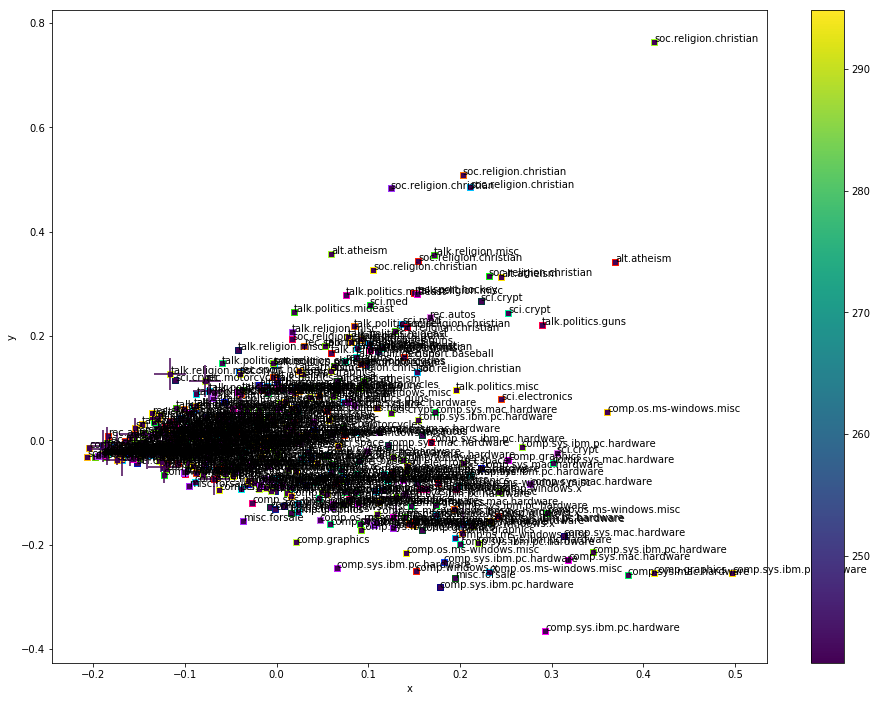

In [29]:
#from sklearn.externals import joblib
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
predictions=Px
predictions = np.array(predictions[0])
centers = np.where(predictions==-1)[0]
print(centers)
pca = PCA(n_components=2)
pca_similarity = pca.fit_transform(similarities)
 
#print(pca_similarity.shape)
#print(pca_similarity)
pca_similarity_centers = pca_similarity[centers]
#pca_features_centers = pca_fetures[centers]
print(pca_similarity_centers)
#pca_similarity_centers = pca_similarity[centers]
#pca_features_centers = pca_fetures[centers]
#import numpy as np
#import matplotlib.pyplot as plt
 
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
 
fig = plt.figure()
ax = fig.add_subplot(111)
 
 
for index,points in enumerate(pca_similarity):
    #pts = plt.scatter(points[0], points[1], marker='s')
   
    #scatter = ax.scatter(points[0],points[1])
    colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
    colorst = [colormap(i) for i in np.linspace(0, 0.9,len(ax.collections))]       
    for t,j1 in enumerate(ax.collections):
        j1.set_color(colorst[t])
         
     #   ax.legend(fontsize='small')
 
    scatter=ax.scatter(points[0],points[1], marker='s',s=30, c=predictions[index])
    ax.annotate(s=str(fileNames[index]).split("\\")[-2],xy=(points[0],points[1]))
    
     
 
for p,center in enumerate(pca_similarity_centers):
    ax.scatter(center[0],center[1],s=1000,c=predictions[index],marker='+')
     
    #ax.annotate("1")
 
#for index,fileNumber in enumerate(cluster_map.keys()):
  #  for 
 #    scatter = ax.scatter(pca_similarity[],pca_similarity[],c=px)
  #   ax.annotate(s=fileNumber,xy=(pca_similarity_centers[index][0],pca_similarity_centers[index][1]))
 
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
 
plt.show()


In [30]:
n

500